### MODEL: NEURAL NETWORK
Used ANN as model with 3 hidden layers and Adam Optimizer

In [1]:
#importing libraries

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
import math

%matplotlib inline


In [3]:
#loading dataset
df_raw = pd.read_csv("../01-University-Admissions/data/Admission_Predict_Ver1.1.csv")
df_raw.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#dropping the S.No. column as its not required
df_raw = df_raw.drop("Serial No.", axis=1)

In [5]:
df_raw.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
#replacing column names
new_cols = ['GRE', 'TOEFL','Univ_rating','SOP','LOR','CGPA','Research','Chance_of_admit']
df_raw.columns=new_cols
df_raw.columns

Index(['GRE', 'TOEFL', 'Univ_rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance_of_admit'],
      dtype='object')

In [7]:
#splitting the dataset
X = df_raw[new_cols[:7]]
Y = df_raw['Chance_of_admit']
X_train = X[:400]
X_test = X[400:]
Y_train = Y[:400]
Y_test = Y[400:]

In [8]:
X_train.describe()

,GRE,TOEFL,Univ_rating,SOP,LOR,CGPA,Research
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


In [9]:
#Scaling the dataset using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
myScaler = MinMaxScaler()
X_cols = list(X_train.columns)
X_train = myScaler.fit_transform(X_train)
X_test = myScaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns = X_cols)
X_test = pd.DataFrame(X_test, columns = X_cols)
X_train.describe()

,GRE,TOEFL,Univ_rating,SOP,LOR,CGPA,Research
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.536150,0.550357,0.521875,0.600000,0.613125,0.576579,0.547500
std,0.229473,0.216768,0.285932,0.251717,0.224619,0.191127,0.498362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360000,0.392857,0.250000,0.375000,0.500000,0.439103,0.000000
50%,0.540000,0.535714,0.500000,0.625000,0.625000,0.580128,1.000000
75%,0.700000,0.714286,0.750000,0.750000,0.750000,0.725160,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Checking the Correlation
df_raw.corr()

,GRE,TOEFL,Univ_rating,SOP,LOR,CGPA,Research,Chance_of_admit
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
Univ_rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [11]:
X_train.shape

(400, 7)

In [12]:
# Train and Validation Split
X_t = X_train[:300]
X_val = X_train[300:400]
Y_t = Y_train[:300]
Y_val = Y_train[300:400]

In [28]:
# MODELLING

training_epochs = 50
learning_rate = 0.021

In [29]:
from keras.optimizers import Adam

In [30]:
def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='mse', optimizer=Adam(learning_rate),metrics=[keras.metrics.RootMeanSquaredError()])
    return model

model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [31]:
#training the model

results = model.fit(
    X_train, Y_train,
    epochs= training_epochs,
    batch_size = 16,
    validation_data=(X_val, Y_val.T)
)

Epoch 1/50
25/25 [==============================] - 0s 9ms/step - loss: 0.0399 - root_mean_squared_error: 0.1997 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1406
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0156 - root_mean_squared_error: 0.1251 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1046
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0122 - root_mean_squared_error: 0.1105 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0906
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0103 - root_mean_squared_error: 0.1014 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0827
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0091 - root_mean_squared_error: 0.0952 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0721
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0077 - root_mean_squared_error: 0.0876 - val_loss: 0.0050 - val_root_mean_sq

Epoch 49/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0054 - root_mean_squared_error: 0.0732 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0586
Epoch 50/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0044 - root_mean_squared_error: 0.0661 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0583


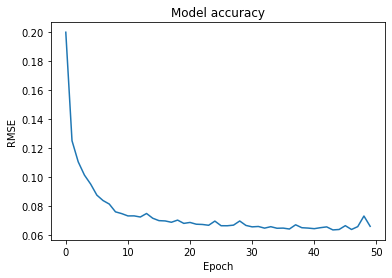

In [32]:
#plotting the training rmse scores vs epochs
plt.plot(results.history['root_mean_squared_error'])
plt.title('Model accuracy')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.show()

In [33]:
#making predictions
predictions = model.predict(X_test)

In [34]:
# RMSE Score for Test Data (last 100 Entries of Data)

y_pred = predictions
mse = mean_squared_error(Y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE for predictions is: ",rmse)
print("\nThe Predicted values are:")
for i in predictions:
    print(i, end = ', ')

RMSE for predictions is:  0.04681277174405588

The Predicted values are:
[0.6043093], [0.6657886], [0.7697755], [0.8709791], [0.5727227], [0.5067533], [0.6463817], [0.6273873], [0.5964915], [0.56626874], [0.55278325], [0.54426515], [0.5927707], [0.6014442], [0.7406797], [0.7797556], [0.60662985], [0.53412783], [0.67230314], [0.64990664], [0.5073082], [0.80039275], [0.81002855], [0.914811], [0.88994], [0.89987934], [0.7385413], [0.7494547], [0.7459992], [0.8970127], [0.6649963], [0.7686596], [0.84862], [0.74908876], [0.6174203], [0.60790336], [0.6128296], [0.6493206], [0.7473562], [0.68371665], [0.53084147], [0.7747351], [0.8888537], [0.8671403], [0.8734796], [0.88095593], [0.90111154], [0.7995831], [0.7634959], [0.76338536], [0.79427195], [0.8556961], [0.8945831], [0.7601243], [0.631336], [0.54487115], [0.5339251], [0.5004146], [0.6930295], [0.86885], [0.7598827], [0.5969185], [0.5944449], [0.58239084], [0.49240598], [0.6469523], [0.7460041], [0.77119243], [0.80261225], [0.85081387], [

In [35]:
model.save('model.h5')